# Setup Environment

## Load Python Modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import os
from image import *
from CNN import *
import util
%load_ext autoreload
%autoreload 2

## Show NVIDIA GPU

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H200 (UUID: GPU-2fb8e130-a6b9-3233-8a3e-f625e7fe1bbc)
GPU 1: NVIDIA H200 (UUID: GPU-a426cdc5-f18f-6126-3116-0a9bd5d7e924)


## Setup utility

In [3]:
util.setup_logger()

# Load and Process Dataset

## Load Dataset

In [4]:
folder_path = os.path.join(os.getenv("HOME"), "scratch")
train_dataset = ImageDataset(os.path.join(folder_path, "train_80p.csv"), use_augmentation=True)
valid_dataset = ImageDataset(os.path.join(folder_path, "validation_10p.csv"), use_augmentation=False)
test_dataset  = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=False)

## Check Dataset

In [5]:
train_dataset.check()

There are 0 missing values
63960 images with label 0, and 63960 with label 1.
All filenames end with .jpg


## (Optional) Show image for verification

Label: 0, shape: torch.Size([3, 512, 768])


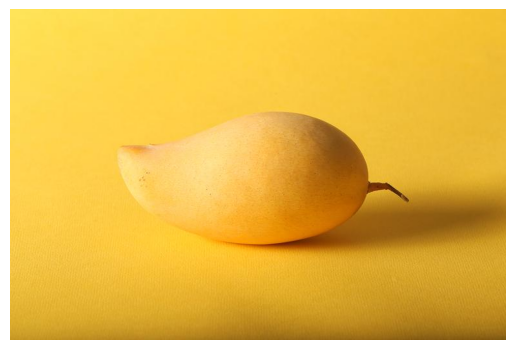

Label: 1, shape: torch.Size([3, 512, 768])


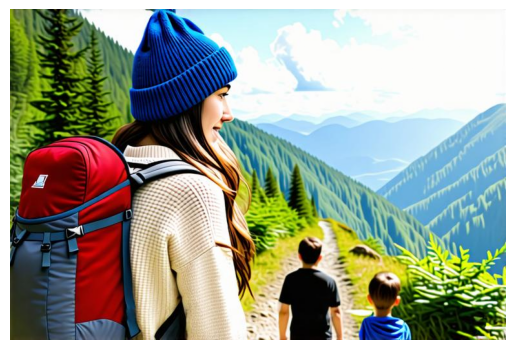

In [11]:
train_dataset.show_image()

## (Optional) Show normalized images

Label: 0, shape: torch.Size([3, 512, 768])
[WARNING] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2208407..0.7783606].


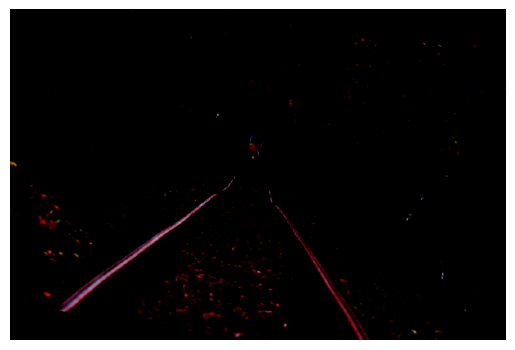

Label: 1, shape: torch.Size([3, 512, 768])
[WARNING] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2509835..1.5361458].


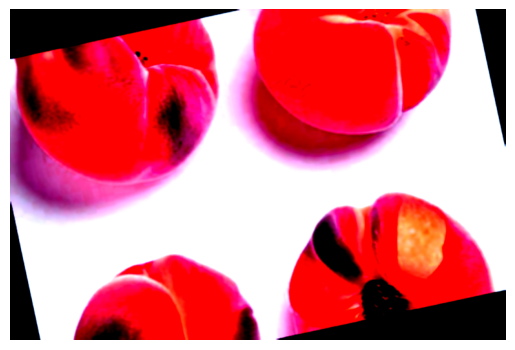

In [8]:
dataset.show_image(transform=True)

# CNN Model

## Create Torch Data Loaders

In [6]:
# train_loader, valid_loader, test_loader = dataset.get_loaders()
train_loader = train_dataset.get_loader()
valid_loader = valid_dataset.get_loader()
test_loader  = test_dataset.get_loader()

## Check CUDA Availability

In [7]:
# "cuda" only when GPUs are available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Training Setup

In [8]:
_exp_name = "CNN_aug"
# The number of training epochs and patience.
n_epochs = 100
patience = 30 # If no improvement in 'patience' epochs, early stop

# Initialize a model, and put it on the device specified.
model, train_losses, valid_losses = try_load_model(_exp_name)
if model == None:
    model = Classifier().to(device)

# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-5)

[INFO] Model loaded from CNN_aug_best.ckpt, loss loaded from CNN_aug_loss.pkl, trained for 20 epochs


## Training

In [9]:
train_model(model, optimizer, train_loader, valid_loader, n_epochs=n_epochs, patience=patience,
            criterion=nn.CrossEntropyLoss(), train_losses = train_losses, valid_losses = valid_losses,
            prefix = _exp_name)

100%|██████████| 250/250 [02:17<00:00,  1.82it/s]


[ Valid | 001/100 ] loss = 0.02461, acc = 0.99198
[ Valid | 001/100 ] loss = 0.02461, acc = 0.99198 -> best


100%|██████████| 3998/3998 [53:35<00:00,  1.24it/s] 


[ Train | 021/100 ] loss = 0.08038, acc = 0.97010


100%|██████████| 250/250 [00:43<00:00,  5.69it/s]


[ Valid | 021/100 ] loss = 0.05253, acc = 0.98238
[ Valid | 021/100 ] loss = 0.05253, acc = 0.98238
Epoch 21 duration: 3259.03 seconds


100%|██████████| 3998/3998 [41:09<00:00,  1.62it/s]


[ Train | 022/100 ] loss = 0.08084, acc = 0.96964


100%|██████████| 250/250 [00:42<00:00,  5.85it/s]


[ Valid | 022/100 ] loss = 0.02887, acc = 0.99175
[ Valid | 022/100 ] loss = 0.02887, acc = 0.99175
Epoch 22 duration: 2512.36 seconds


100%|██████████| 3998/3998 [42:25<00:00,  1.57it/s]


[ Train | 023/100 ] loss = 0.08064, acc = 0.97018


100%|██████████| 250/250 [00:55<00:00,  4.49it/s]


[ Valid | 023/100 ] loss = 0.03114, acc = 0.98958
[ Valid | 023/100 ] loss = 0.03114, acc = 0.98958
Epoch 23 duration: 2601.38 seconds


100%|██████████| 3998/3998 [42:10<00:00,  1.58it/s]


[ Train | 024/100 ] loss = 0.08070, acc = 0.97051


100%|██████████| 250/250 [00:43<00:00,  5.76it/s]


[ Valid | 024/100 ] loss = 0.02727, acc = 0.99250
[ Valid | 024/100 ] loss = 0.02727, acc = 0.99250 -> best
Epoch 24 duration: 2574.42 seconds
Best model found at epoch 23, saving model


100%|██████████| 3998/3998 [41:51<00:00,  1.59it/s]


[ Train | 025/100 ] loss = 0.07940, acc = 0.97031


100%|██████████| 250/250 [00:43<00:00,  5.68it/s]


[ Valid | 025/100 ] loss = 0.03077, acc = 0.98988
[ Valid | 025/100 ] loss = 0.03077, acc = 0.98988
Epoch 25 duration: 2555.06 seconds


100%|██████████| 3998/3998 [41:57<00:00,  1.59it/s]


[ Train | 026/100 ] loss = 0.07619, acc = 0.97180


100%|██████████| 250/250 [00:46<00:00,  5.35it/s]


[ Valid | 026/100 ] loss = 0.02834, acc = 0.99175
[ Valid | 026/100 ] loss = 0.02834, acc = 0.99175
Epoch 26 duration: 2564.05 seconds


100%|██████████| 3998/3998 [41:41<00:00,  1.60it/s]


[ Train | 027/100 ] loss = 0.07514, acc = 0.97242


100%|██████████| 250/250 [00:49<00:00,  5.00it/s]


[ Valid | 027/100 ] loss = 0.02418, acc = 0.99188
[ Valid | 027/100 ] loss = 0.02418, acc = 0.99188
Epoch 27 duration: 2551.37 seconds


100%|██████████| 3998/3998 [41:41<00:00,  1.60it/s]


[ Train | 028/100 ] loss = 0.07569, acc = 0.97224


100%|██████████| 250/250 [00:41<00:00,  6.02it/s]


[ Valid | 028/100 ] loss = 0.02552, acc = 0.99125
[ Valid | 028/100 ] loss = 0.02552, acc = 0.99125
Epoch 28 duration: 2543.40 seconds


100%|██████████| 3998/3998 [41:01<00:00,  1.62it/s]


[ Train | 029/100 ] loss = 0.07565, acc = 0.97192


100%|██████████| 250/250 [00:41<00:00,  6.05it/s]


[ Valid | 029/100 ] loss = 0.08165, acc = 0.97263
[ Valid | 029/100 ] loss = 0.08165, acc = 0.97263
Epoch 29 duration: 2502.38 seconds


100%|██████████| 3998/3998 [41:22<00:00,  1.61it/s]


[ Train | 030/100 ] loss = 0.07181, acc = 0.97353


100%|██████████| 250/250 [00:41<00:00,  6.07it/s]


[ Valid | 030/100 ] loss = 0.02759, acc = 0.99075
[ Valid | 030/100 ] loss = 0.02759, acc = 0.99075
Epoch 30 duration: 2523.84 seconds


 57%|█████▋    | 2267/3998 [23:29<17:56,  1.61it/s]


KeyboardInterrupt: 

# Testing the Model

## Load the model

[INFO] Model loaded from CNN2_best.ckpt, loss loaded from CNN2_loss.pkl, trained for 71 epochs


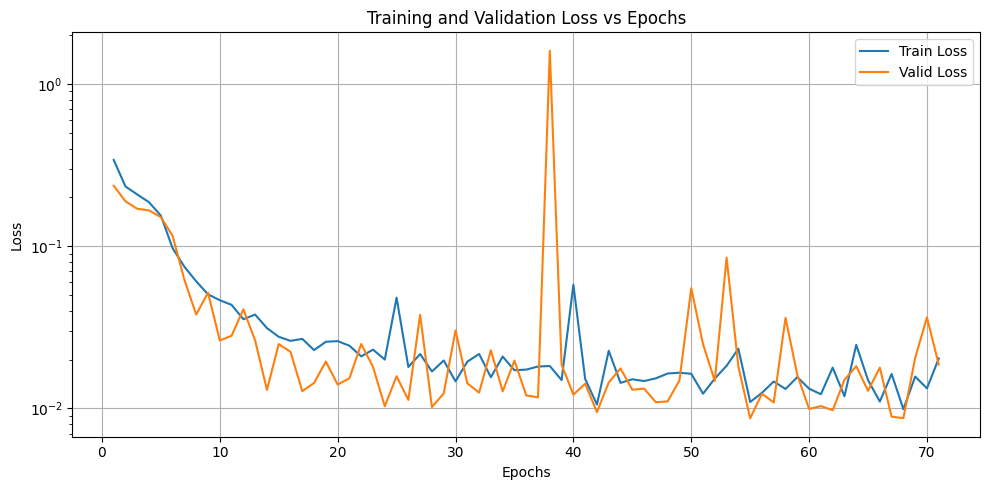

In [18]:
# model = load_model(f"{_exp_name}_best.ckpt")
model, train_losses, valid_losses = try_load_model(_exp_name)
plot_losses(train_losses, valid_losses)

## Evaluation

In [24]:
evaluate_model(model, test_loader)

100%|██████████| 7995/7995 [07:30<00:00, 17.76it/s]

Test Accuracy: 0.6862
F1 Score: 0.6844
F2 Score: 0.6846
AUC: 0.7623


(0.6861788617886179,
 0.6844162475346975,
 0.6845580537243631,
 np.float64(0.7622869478271785))